### About Dataset

The Dataset Census_Income is extracted  from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).
The main aim behind taking this dataset was to check whether the person makes  more than 50$ or less than it
In this datset they had taken into account many factors like Age , Workclass fnlwgt education and many things

fnlwgt here emplies to the final weight which is calculated using 3 set of controlsby the  Current Population Survey (CPS) for the Hispanic people

A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 
    
our work is to make a model that predicts  whether a person makes over $50K a year or not


### Importing libraries

In [1]:
import pandas as pd
import numpy as np

### Loading Dataset

In [2]:
df=pd.read_csv("census_income.csv")

#### Basic Insights of the Datasets

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#  Checking the Datatypes of Attributes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
# Checking the number of records and attributes
df.shape

(32560, 15)

In [6]:
#checking the column names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')










### Checking the Null Values in the dataset

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As all the column _names have 0 in front of them it means there are no Null Values

### Visualizing the Dataset

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

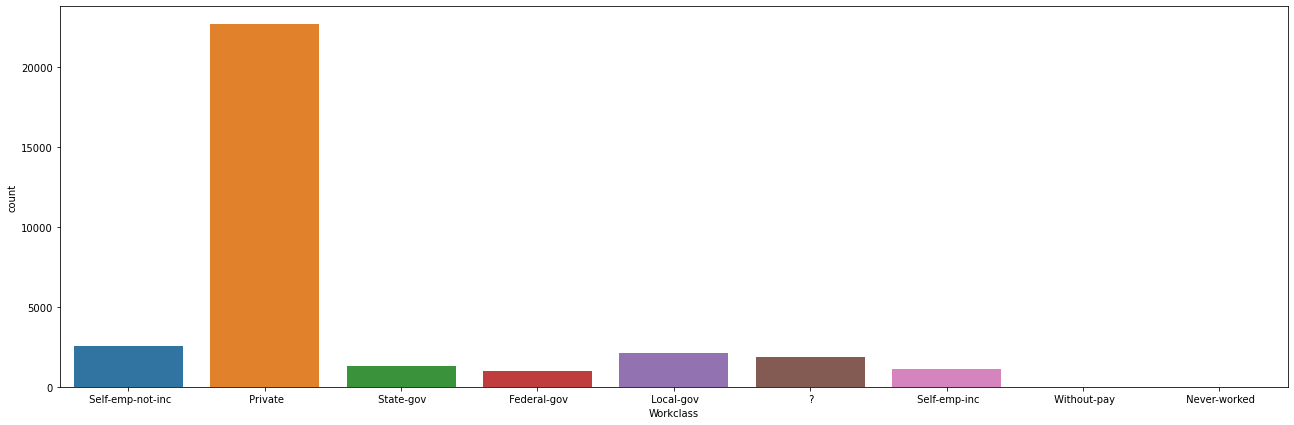

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Visualizing the Nominal Data of the Dataset
plt.figure(figsize=(22,7))
sns.countplot(x=df['Workclass'])
df['Workclass'].value_counts()

22696 people belongs to Private Workclass, 

2541 people are self_emp_not_inc workclass,

1836 belongs to Unknown workclass,

1297 are in State-gov workclass,

1116 are of self-emp-inc workclass,

906 are from Fedral-gov-workclass,

14 are on without pay,

and 7 have never-worked.


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

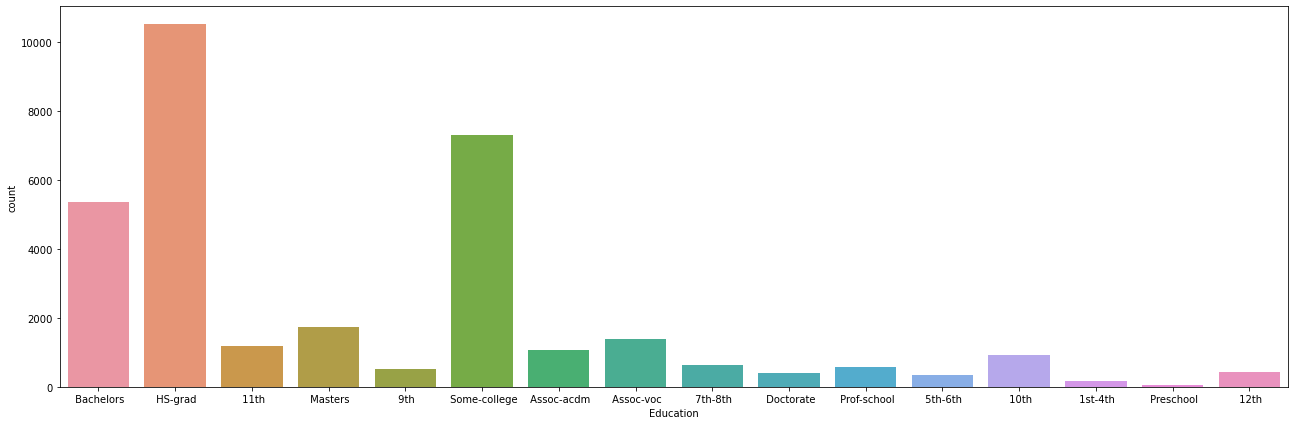

In [9]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Education'])
df['Education'].value_counts()

10501 people are HS-graded,   7291 people belongs to the some college,

5354 people are Bachelors,    1723 have studied Masters

1832 people have done associated vocational,  1175 are 11th passed

1067 have done associated academics, 

933 are 10th passed,

514 people are 9 th passed

646 are 7th or 8th passed people, 

576 have completedtheir prof-school

433 people have completed their 12th

413 people have done Doctorate and  333 people are 5th - 6th  passed , 166 people have done their studies upto 1st to 4 th

and 51 have completed only their pre-school

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

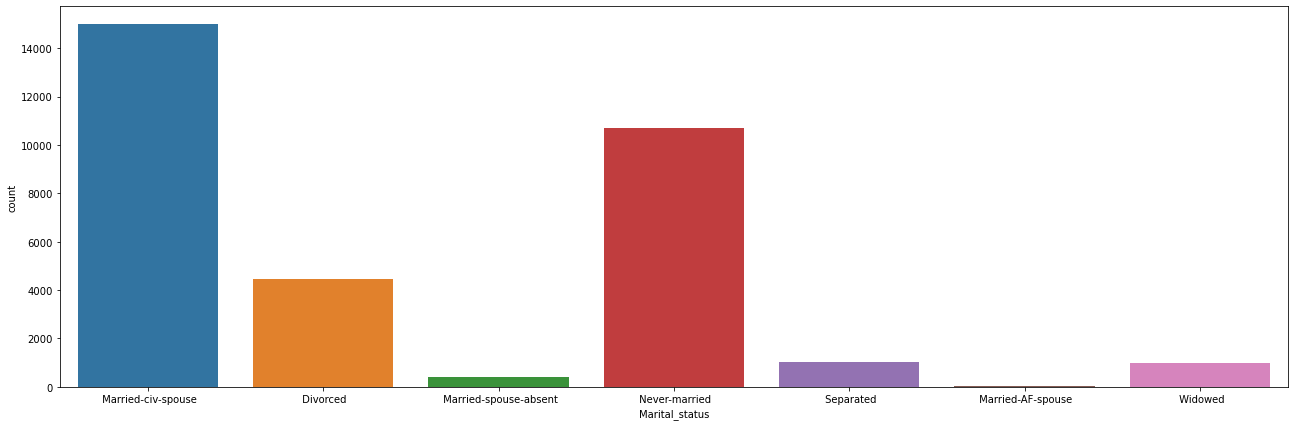

In [10]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Marital_status'])
df['Marital_status'].value_counts()

14976 are Married-civ-spouse

10682 are never-married

4443 are Divorced

1025 are separated

993 are widowed

413 are Married-spouse-absent     
 
and 23 are    Married-AF-spouse           

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

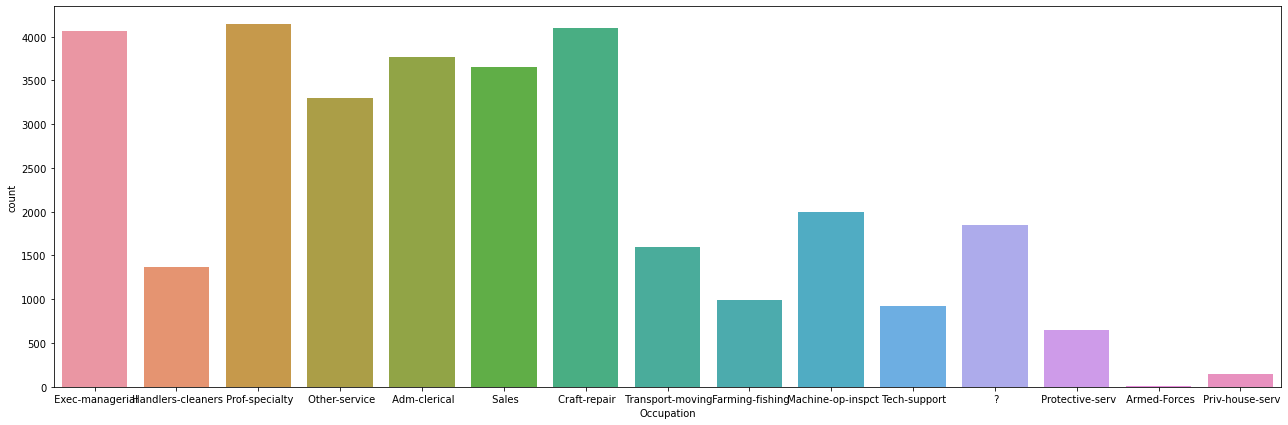

In [11]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Occupation'])
df['Occupation'].value_counts()

4140 people are  Professional-specialty ,      4099  do the occupation of  Craft-repair

4066 do the occupation Executive -managerial  , 3796 are  doing  Administration-clerical work

3650 people are in Sales  Occupation   , 3295 are engaged in  Other-service        

 2002 people are in Machine-op-inspct    1843  are doing some unknown occupation
  
1597 people are doing Transport-moving  occupation  ,      1370 are Handlers-cleaners ,

994 do the  Farming-fishing   ,  928 are in  Tech-support         

 649 do  Protective-services , 149 are      private -house-servants
 
and 9 are in  Armed-Forces           

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

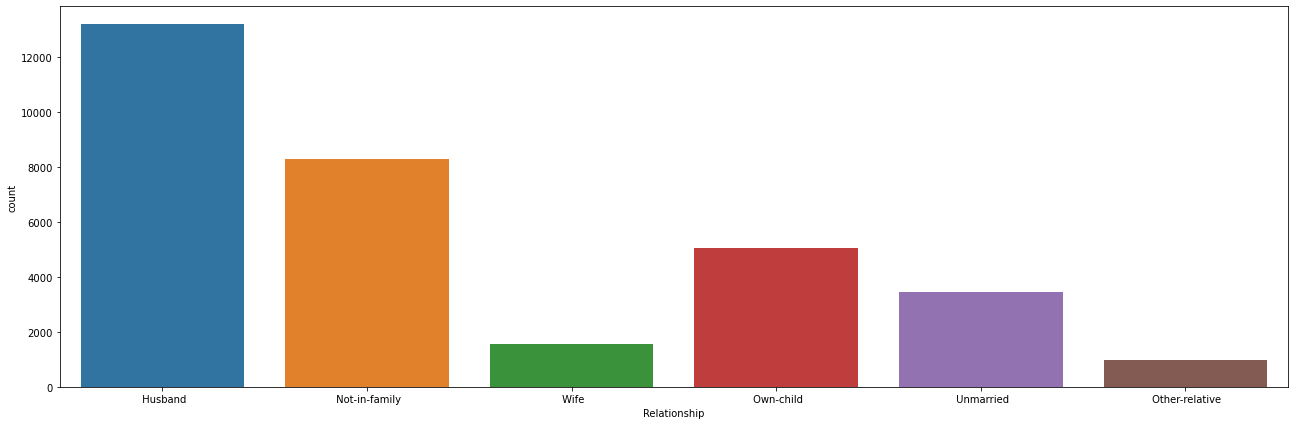

In [12]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Relationship'])
df['Relationship'].value_counts()

13193 are Husbands , 8304 people are not in family ,  5068 are Own-child

3446 are unmarried , 1568 are wife and 981 are other-relative

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

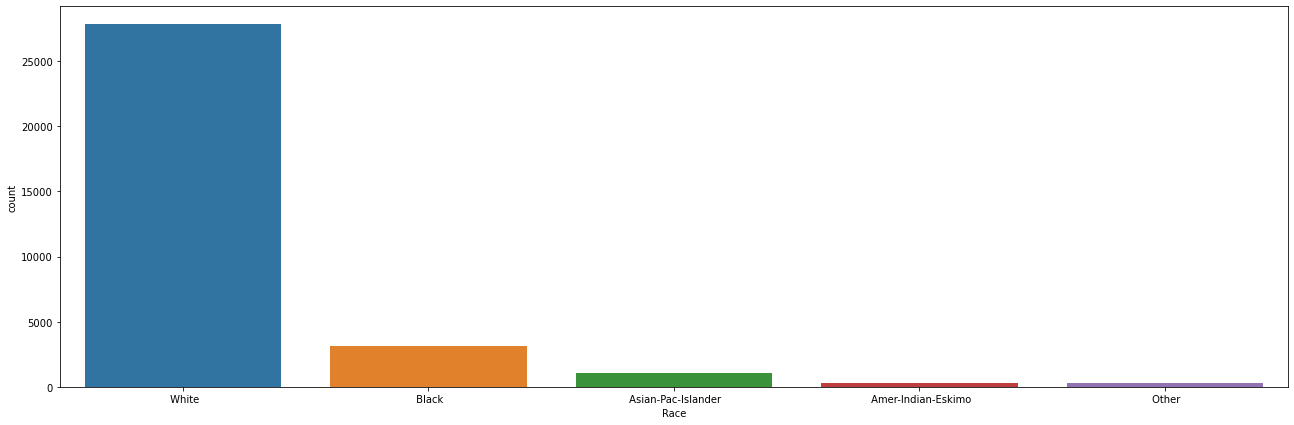

In [13]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Race'])
df['Race'].value_counts()

27815 people are White people , 

3124 are black people

1039 are  Asian-Pac-Islander     

311  are American-Indian-Eskimo      3

and 271 are of other Race

 Male      21789
 Female    10771
Name: Sex, dtype: int64

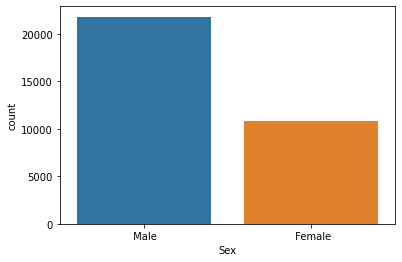

In [14]:

sns.countplot(x=df['Sex'])
df['Sex'].value_counts()

21789 are Male candidates and

10771 are Female candidated

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

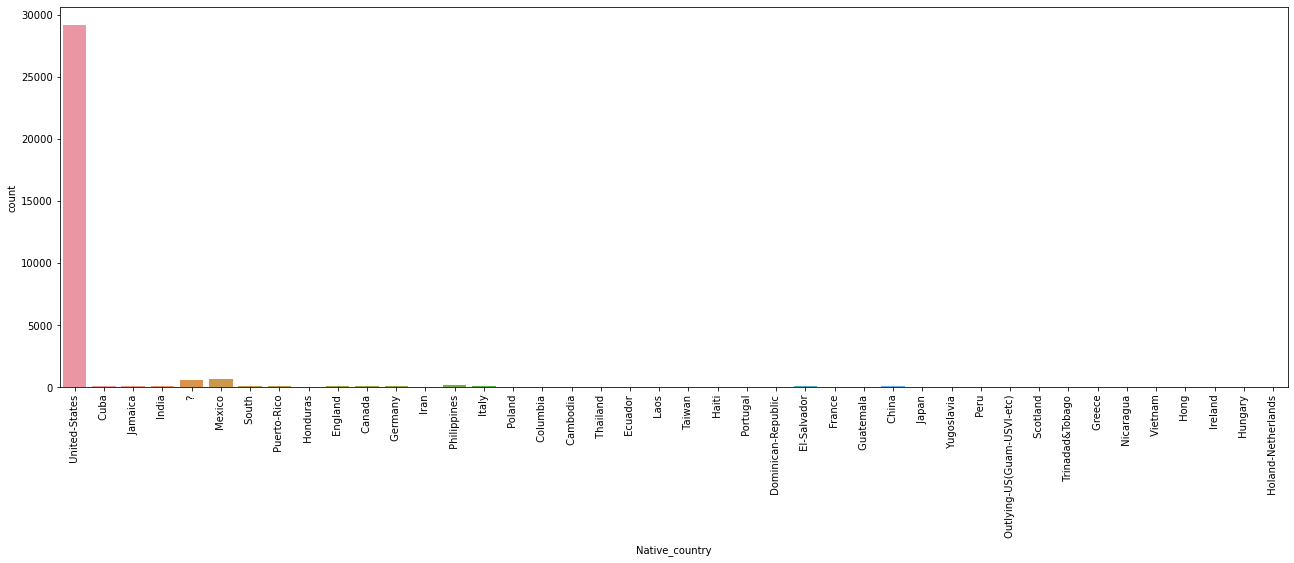

In [15]:

plt.figure(figsize=(22,7))
p=sns.countplot(x=df['Native_country'])
p.set_xticklabels(p.get_xticklabels(),rotation=90)
df['Native_country'].value_counts()

29169 people belong from United States and remaining are from various native countries

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

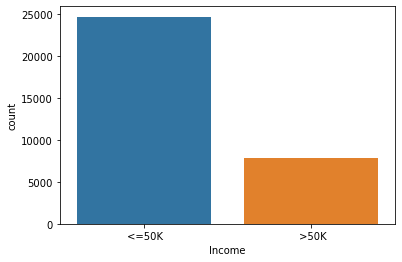

In [16]:

sns.countplot(x=df['Income'])
df['Income'].value_counts()

 24719 people have income greater than or equal to 50 Thousand $

and  7841 people have income less than 50 thousand $

<AxesSubplot:ylabel='Frequency'>

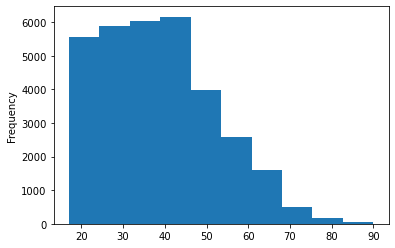

In [17]:
df['Age'].plot.hist()

The Age column is normally distributed, the highest number of people have their Age between 40 to 50

<AxesSubplot:ylabel='Frequency'>

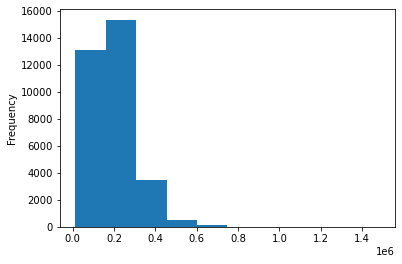

In [18]:
df['Fnlwgt'].plot.hist()

Highest Final weight recorded os 15000 that is between 0.2 to 0.3

<AxesSubplot:ylabel='Frequency'>

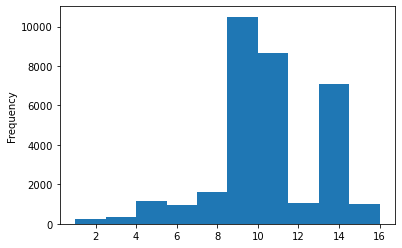

In [19]:
df['Education_num'].plot.hist()

more than 10,000  people have education_num between  8 to 10.0

<AxesSubplot:ylabel='Frequency'>

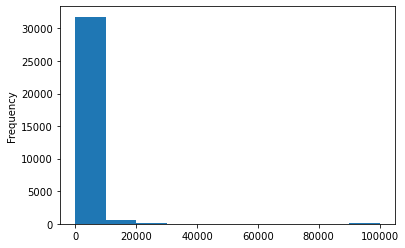

In [20]:
df['Capital_gain'].plot.hist()

Capital gain of more than 30000 people is between 0 and 20000

<AxesSubplot:ylabel='Frequency'>

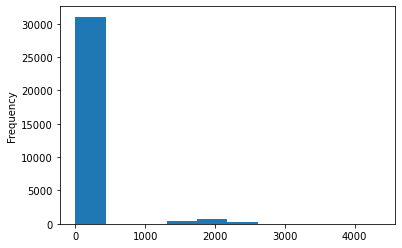

In [21]:
df['Capital_loss'].plot.hist()

More tha 30000 people have capital lost of 0 to 5000

<AxesSubplot:ylabel='Frequency'>

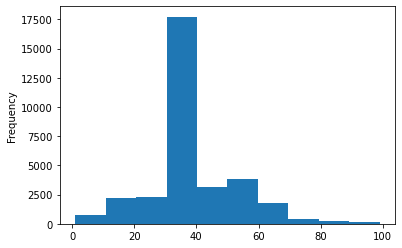

In [22]:
df['Hours_per_week'].plot.hist()

More than 17500 people work 30-40 hours a week

### Summary from Visualization
As we observed in the visualization , that Workclass , Occupation and Native_country were having some unknown values denoted as '?'

so it is necessary to fill this empty data

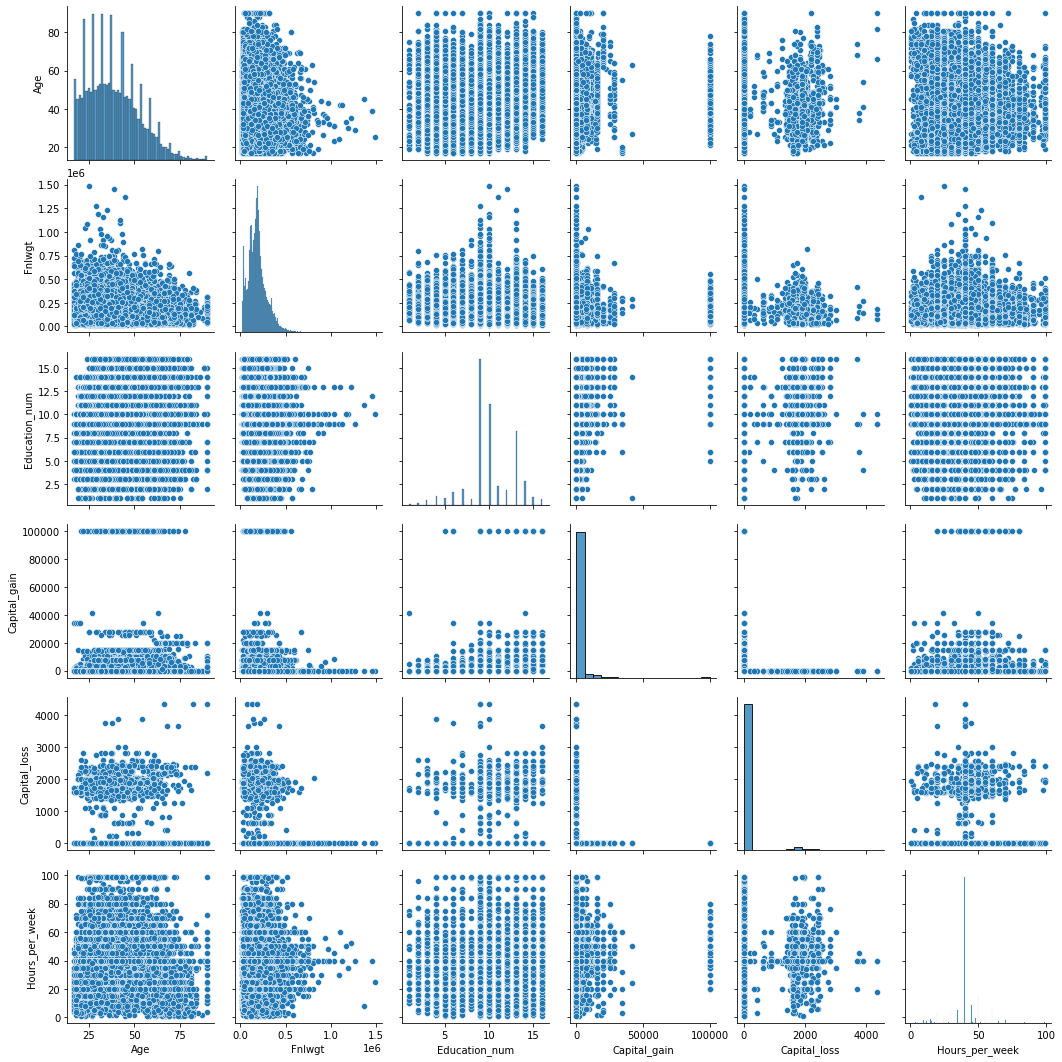

In [23]:
sns.pairplot(df)

### Simple Imputer

In [24]:
from sklearn.impute import SimpleImputer


list1=['Workclass','Occupation','Native_country']
for i in list1:
    imp=SimpleImputer(strategy="most_frequent")
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))


### Label Encoding --Turning Categorical values into Numerical variables

In [25]:
# As all the columns are of Object type its better to convert them labelly for better learning of the Model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes == object:
        df[i]=le.fit_transform(df[i].astype(str))

In [26]:
#rechecking dtypes after label encoding
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

### Descriptive Statistics

describe() method in python describes the basic features of the data,

It gives short summaries aboout the dataset and measures of the dataset like No of items , mean , Standard_Deviation , minimum value of 
dataset, 25th, 50th(median) and 75% percentile of each  column and Gives the maximum value of the dataset too

In [27]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


observations :-


1)There is a significant differenec between 75 % and max of Age , Capital_gain , Hours_per_week and Income

2) The value of standard deviation is so high in columns  like capital_dain and  capital_loss it means the skewness in present



### Checking Correlation

Correlation is a statistical metric for measuring to what extent  different variables are Interdependent .

In another word, if one variable changes how it affects the change in another variable

In [28]:
dfcor=df.corr()

<AxesSubplot:>

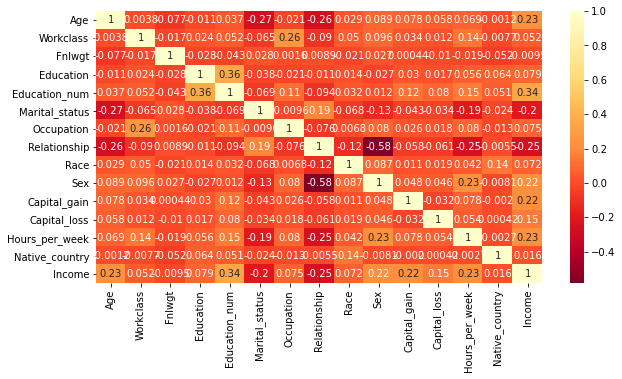

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(dfcor, cmap="YlOrRd_r", annot=True)

### Checking Outliers 

Outliers are the values that fall really outside the range of the data, and it is checked through two methods zscore and IQR


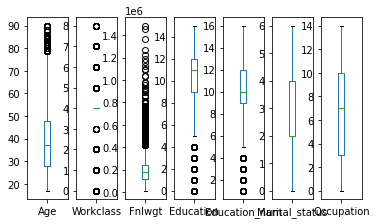

In [30]:
# visualizing Outliers
df.iloc[:,0:7].plot(kind='box',subplots=True)
plt.subplots_adjust(bottom=0.25)
plt.show()


As we mentioned in statistically summary that Age is having outliers ,

Workclass, Education   is a conversion of Categorical data into numerical so it is showing the outliers point 

very high amount of outliers aer present in FnlWgt

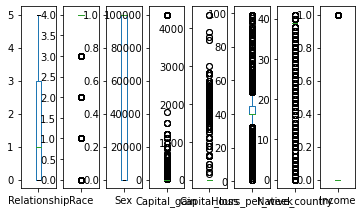

In [31]:

df.iloc[:,7:].plot(kind='box',subplots=True)
plt.subplots_adjust(bottom=0.25)
plt.show()


capital_gain , Capital_loss and Hours_per_week are also having outliers 

Native_country is a conversion of catego`rial into numeric so it is showing outliers all over 

and as Income column waqs having only two values so it is showing outlier as a single point

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [33]:
df_new=df[(z<3).all(axis=1)]

In [34]:
df_new.shape,  df.shape

((27417, 15), (32560, 15))

In [35]:
data_loss = ((32560-27417)/32560)*100

In [36]:
data_loss

15.795454545454547

we might have deleted outliers but deleting 15% of data is not at all affordable so droping idea of removing outliers

### checking skewness

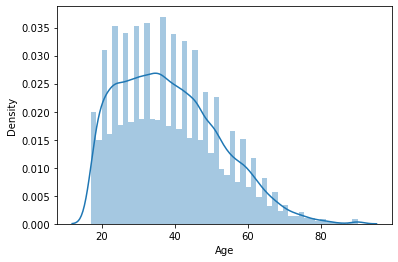

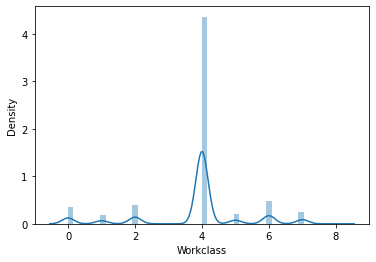

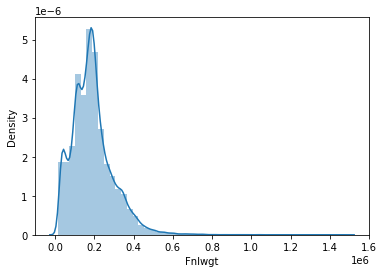

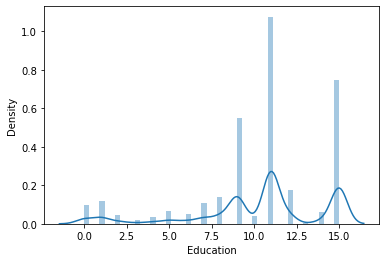

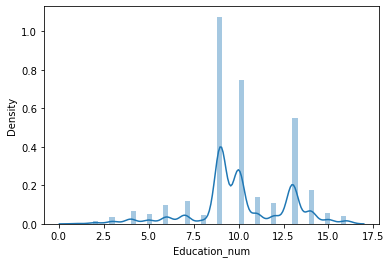

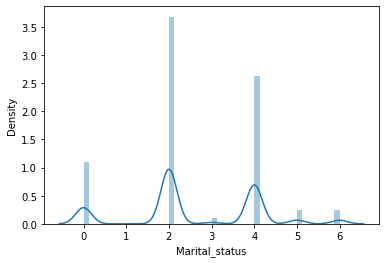

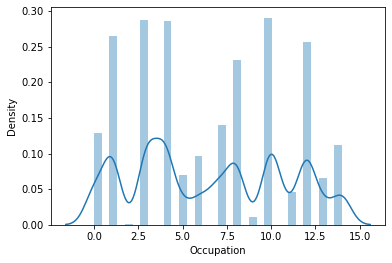

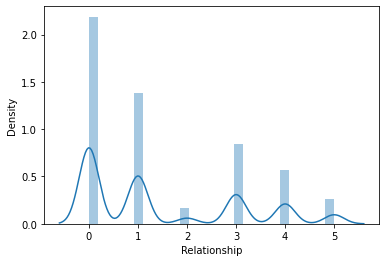

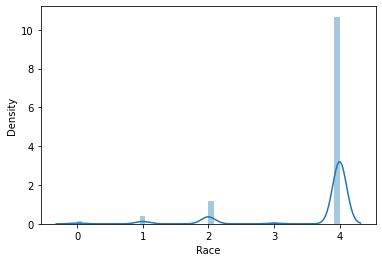

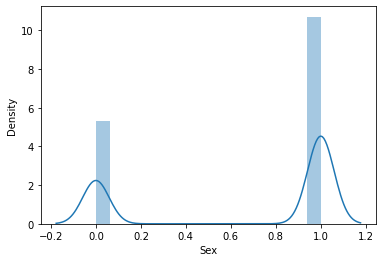

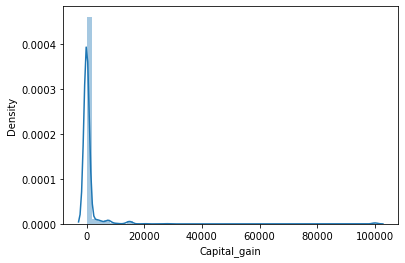

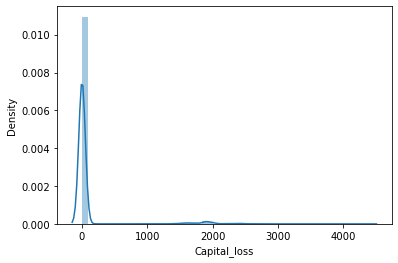

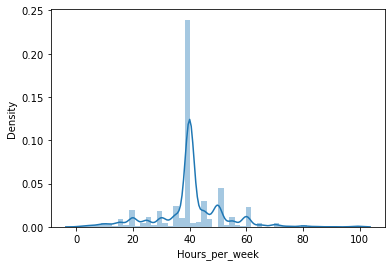

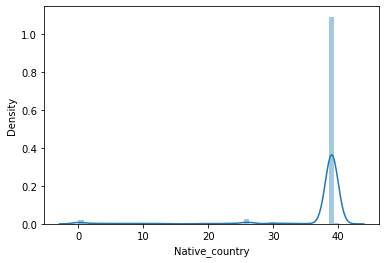

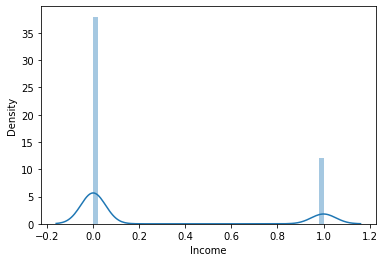

In [37]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

there is a high skewness present in capital_gain, capital_loss

In [38]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

As many of the columns have skew score more than .5 it means skewness is present and it should be treated after splitting the data in x and y

### Splitting the Data in X (features)  and Y (Target )

In [39]:
x=df.drop('Income',axis=1)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39


In [40]:
# treating skewness
from sklearn.preprocessing  import power_transform

df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [41]:
x=df_new

In [42]:
y=df['Income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix


### Finding the best random_state of LogisticRegression and training it

In [44]:
maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    accuracy=accuracy_score(y_test,predlg)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

maximum accuracy  is :  0.8398939140145171 and best random state is 109


In [51]:
from sklearn.linear_model import LogisticRegression

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=109)
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg = lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))


0.8398939140145171
[[5220  328]
 [ 819  797]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5548
           1       0.71      0.49      0.58      1616

    accuracy                           0.84      7164
   macro avg       0.79      0.72      0.74      7164
weighted avg       0.83      0.84      0.83      7164



###### LogisticRegression has got the accuracy of 83% 

## Finding the best random_state on DecisionTreeClassifier and training it

In [45]:
from sklearn.tree import DecisionTreeClassifier


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    accuracy=accuracy_score(y_test,preddtc)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

maximum accuracy  is :  0.8165829145728644 and best random state is 500


In [55]:
from sklearn.tree import DecisionTreeClassifier

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=500)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8132328308207705
[[4798  716]
 [ 622 1028]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5514
           1       0.59      0.62      0.61      1650

    accuracy                           0.81      7164
   macro avg       0.74      0.75      0.74      7164
weighted avg       0.82      0.81      0.82      7164



###### DecisionTreeClassifier has got the accuracy of 81%

## Finding the best random_state on RandomForestClassifier and training it

In [46]:
from sklearn.ensemble import RandomForestClassifier


maxaccuracy = 0
best_random_state = 0

for i in range(1,1000):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    predrfc=rfc.predict(x_test)
    accuracy=accuracy_score(y_test,predrfc)
    #print(f"accuracy is {accuracy} at random_state {i}")
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
        print(f"accuracy is {accuracy} at random_state {i}")
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

accuracy is 0.8585985482970407 at random_state 1
accuracy is 0.8601340033500837 at random_state 109
accuracy is 0.8632049134561698 at random_state 190
accuracy is 0.8634840871021775 at random_state 586
maximum accuracy  is :  0.8634840871021775 and best random state is 586


In [56]:
from sklearn.ensemble import RandomForestClassifier

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=586)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))


0.8606923506420994
[[5129  357]
 [ 641 1037]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5486
           1       0.74      0.62      0.68      1678

    accuracy                           0.86      7164
   macro avg       0.82      0.78      0.79      7164
weighted avg       0.85      0.86      0.86      7164



###### RandomForestClassifier has got the accuracy of 86 %

### Finding the best random_state on SVC and training it

In [53]:
from sklearn.svm import SVC


maxaccuracy = 0
best_random_state = 0

for i in range(1,100):
    x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    accuracy=accuracy_score(y_test,predsvc)
    if accuracy > maxaccuracy:
        maxaccuracy = accuracy
        best_random_state =i
        print(f"accuracy is {accuracy} at random_state {i}")
print(f"maximum accuracy  is :  {maxaccuracy} and best random state is {best_random_state}")

accuracy is 0.8375209380234506 at random_state 1
accuracy is 0.8386376326074818 at random_state 5
accuracy is 0.8400335008375209 at random_state 10
accuracy is 0.8419877163595757 at random_state 11
accuracy is 0.8432439977666109 at random_state 18
accuracy is 0.8457565605806812 at random_state 56
maximum accuracy  is :  0.8457565605806812 and best random state is 56


In [54]:
from sklearn.svm import SVC

x_train,x_test, y_train , y_test =train_test_split(x,y,test_size=.22,random_state=56)
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))



0.8457565605806812
[[5158  342]
 [ 763  901]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5500
           1       0.72      0.54      0.62      1664

    accuracy                           0.85      7164
   macro avg       0.80      0.74      0.76      7164
weighted avg       0.84      0.85      0.84      7164



###### svc has got the accuracy of 84 %

### Cross Validation  of all the model

In [ ]:
wait here

In [58]:
# checking the cross-validation-score of the logistic model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.8249078624078624 
 At  cross fold 3  the cv_core is 0.8249693531652391 
 At  cross fold 4  the cv_core is 0.8248771498771499 
 At  cross fold 5  the cv_core is 0.8247235872235871 
 At  cross fold 6  the cv_core is 0.8250615010932786 
 At  cross fold 7  the cv_core is 0.824969295863692 
 At  cross fold 8  the cv_core is 0.8247850122850123 
 At  cross fold 9  the cv_core is 0.8251535018531756 


###### LogisticRegression has got the cross_val_score of 82.51 % at cv=8

In [59]:
# checking the cross-validation-score of the DecisionTreeClassifier model is 
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.7998771498771499 
 At  cross fold 3  the cv_core is 0.8033784968545118 
 At  cross fold 4  the cv_core is 0.8015970515970516 
 At  cross fold 5  the cv_core is 0.8024570024570025 
 At  cross fold 6  the cv_core is 0.8034092290364986 
 At  cross fold 7  the cv_core is 0.8029488185691708 
 At  cross fold 8  the cv_core is 0.803409090909091 
 At  cross fold 9  the cv_core is 0.8037775094395962 


###### DecisionTreeClassifer has got the cross_val_score of 80.37 % at cv=9

In [60]:
# checking the cross-validation-score of the RandomForestClassifier model is
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.8492321867321868 
 At  cross fold 3  the cv_core is 0.8519042379347873 
 At  cross fold 4  the cv_core is 0.850982800982801 
 At  cross fold 5  the cv_core is 0.8524262899262899 
 At  cross fold 6  the cv_core is 0.8528870767684378 
 At  cross fold 7  the cv_core is 0.8520580189659298 
 At  cross fold 8  the cv_core is 0.8543611793611794 
 At  cross fold 9  the cv_core is 0.8525491626301741 


###### RandomForestClassifier has got the cross_Val_score of    85.43 % at cv=8 

In [61]:
# checking the cross-validation-score of the SVC model
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

 At  cross fold 2  the cv_core is 0.8334766584766584 
 At  cross fold 3  the cv_core is 0.8352580839864162 
 At  cross fold 4  the cv_core is 0.8361793611793611 
 At  cross fold 5  the cv_core is 0.8357186732186733 
 At  cross fold 6  the cv_core is 0.8363024402363277 
 At  cross fold 7  the cv_core is 0.8364561144973569 
 At  cross fold 8  the cv_core is 0.8366707616707616 
 At  cross fold 9  the cv_core is 0.8367628980503232 


###### SVC has got the cross_val_score of 83.67  at   cv=9

At cv=7 we are getting highest cross_val_Score so considering it as best

### Checking Cross- Validation of all the model

In [ ]:
#  MODEL                       ACCURCAY             CROSS_VAL_SCORE                DIFFERENCE
# Logistic Regression           83                       82                           1
# DecisionTreeClassifier        81                       80                           1  
# RandomForestClassifier        86                       85                           1
# SupportVectorClass            84                       83                           1

##### we can see that  all models have diffetence of 1 between their Accuracy and  Cross_Val_Score , but   RandomForestClassifier has the highest accuracy score of 86 % and highest cross_val_score of 85 % it means  that RandomForestClassifier has learnt well

### Hyper Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV
 # creating parameter list to pass in GridSearchCV
parameters ={'n_estimators':[50,100,150,200,250],
            'random_state' :[412,42,409]}

In [63]:
rfcgscv=GridSearchCV(RandomForestClassifier(),parameters,cv=8)

In [65]:
rfcgscv.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250],
                         'random_state': [412, 42, 409]})

In [66]:
rfcgscv.best_params_

{'n_estimators': 100, 'random_state': 409}

In [67]:
rfgs_pred=rfcgscv.best_estimator_.predict(x_test)

In [68]:
accuracy_score(y_test,rfgs_pred)

0.8626465661641541

In [69]:
import pickle
filename='census_income_RFC.pkl'
pickle.dump(rfcgscv.best_estimator_,open(filename,'wb'))

### conclusion

In [70]:
loaded_model=pickle.load(open('census_income_RFC.pkl','rb'))
result=loaded_model.score(x_test,y_test)

print(result)

0.8626465661641541


In [71]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],rfgs_pred[:]],index=["Predicted","Original"])

In [72]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,7154,7155,7156,7157,7158,7159,7160,7161,7162,7163
Predicted,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Original,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


###### As you can see the predicted and Original are same it means that our model has learnt well